Keras를 사용하는 방법은 어렵지 않기 때문에 바로 MNIST 데이터를 이용해 신경망을 구현하는 예를 보인다.

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

plt.figure(figsize=(10,2))
for i in range(36):
    plt.subplot(3,12,i+1) 
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

<Figure size 1000x200 with 36 Axes>

Keras의 MNIST 이미지 데이터는 28x28로 scikit-learn보다 고해상도이다.

In [3]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


데이터를 float 타입으로 변환 후 스케일링한다. 이는 이미지를 전처리하는 보편적인 방법 중 하나이다.

In [13]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


정답데이터는 라벨에 해당하는 숫자로 되어 있다.

In [5]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

이 값을keras.np_utils.categorical()을 사용하여 원핫인코딩(One-Hot-Encoding)로 변환한다.

In [6]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 신경망 구현 순서

Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

Sequential 모형 클래스 객체 생성

add 메서드로 레이어 추가.
    입력단부터 순차적으로 추가한다.
    레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
    최초의 레이어는 input_dim 인수로 입력 크기를 설정해야 한다.
    activation 인수로 활성화함수 설정

compile 메서드로 모형 완성.
    loss인수로 비용함수 설정
    optimizer 인수로 최적화 알고리즘 설정
    metrics 인수로 트레이닝 단계에서 기록할 성능 기준 설정

fit 메서드로 트레이닝
    nb_epoch 로 에포크(epoch) 횟수 설정
    batch_size 로 배치크기(batch size) 설정
    verbose는 학습 중 출력되는 문구를 설정하는 것으로, 주피터노트북(Jupyter Notebook)을 사용할 때는 verbose=2로 설정하여 진행 막대(progress bar)가 나오지 않도록 설정한다.

다음은 간단한 신경망 모형을 방금 설명한 방법으로 구현한 것이다.

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import numpy as np
np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.2), loss = 'mean_squared_error', metrics=['accuracy'])

만들어진 모형은 model_to_dot 명령이나 summary 명령으로 모델 내부의 layers 리스트를 살펴봄으로써 내부 구조를 확인할 수 있다.

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


layers 속성으로 각 레이어의 특성을 살펴볼 수도 있다.

In [10]:
l1 = model.layers[0]
l2 = model.layers[1]

print(l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params())
print(l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params())

dense_1 <class 'keras.layers.core.Dense'> (None, 15) sigmoid 11775
dense_2 <class 'keras.layers.core.Dense'> (None, 10) sigmoid 160


모델을 완성했다면 fit 메서드로 트레이닝을 시작한다.

In [15]:
%%time
hist = model.fit(X_train, Y_train,
                epochs=10, batch_size=100,
                validation_data=(X_test, Y_test),
                verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0455 - acc: 0.7738 - val_loss: 0.0439 - val_acc: 0.7897
Epoch 2/10
 - 1s - loss: 0.0435 - acc: 0.7865 - val_loss: 0.0420 - val_acc: 0.8015
Epoch 3/10
 - 1s - loss: 0.0417 - acc: 0.7975 - val_loss: 0.0402 - val_acc: 0.8131
Epoch 4/10
 - 1s - loss: 0.0400 - acc: 0.8090 - val_loss: 0.0386 - val_acc: 0.8234
Epoch 5/10
 - 1s - loss: 0.0385 - acc: 0.8182 - val_loss: 0.0371 - val_acc: 0.8363
Epoch 6/10
 - 1s - loss: 0.0371 - acc: 0.8293 - val_loss: 0.0358 - val_acc: 0.8432
Epoch 7/10
 - 1s - loss: 0.0359 - acc: 0.8364 - val_loss: 0.0345 - val_acc: 0.8505
Epoch 8/10
 - 1s - loss: 0.0347 - acc: 0.8444 - val_loss: 0.0334 - val_acc: 0.8567
Epoch 9/10
 - 1s - loss: 0.0336 - acc: 0.8504 - val_loss: 0.0323 - val_acc: 0.8614
Epoch 10/10
 - 1s - loss: 0.0326 - acc: 0.8564 - val_loss: 0.0313 - val_acc: 0.8650
Wall time: 10.2 s


학습이 끝나면 기록된 변수를 확인한다. 다음 두 그래프는 방금 학습 시킨 모델의 비용함수와 성능지표에 대한 것이다.

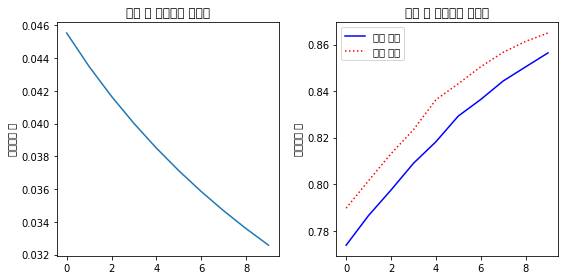

In [16]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("훈련 중 비용함수 그래프")
plt.ylabel("비용함수 값")
plt.subplot(1, 2, 2)
plt.title("훈련 중 성능지표 그래프")
plt.ylabel("성능지표 값")
plt.plot(hist.history['acc'], 'b-', label="학습 성능")
plt.plot(hist.history['val_acc'], 'r:', label="검증 성능")
plt.legend()
plt.tight_layout()
plt.show()

## 가중치 정보

트레이닝이 끝난 모형의 가중치 정보는 get_weights 메서드로 구할 수 있다. 이 메서드는 신경망 모형에서 사용된 가중치  w  값과  b  값을 출력한다.

In [17]:
# 첫번째 레이어
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [19]:
# 두번째 레이어
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

## 모형의 사용
트레이닝이 끝난 모형은 predict 메서드로 y 값을 출력하거나 출력된 y값을 각 클래스에 대한 판별함수로 가정하고 predict_classes 메서드로 분류를 수행할 수 있다. 예로 테스트 데이터셋의 첫번째 이미지를 예측하면 다음과 같다.

In [21]:
model.predict(X_test[:1, :])

array([[0.0292124 , 0.03600887, 0.01668539, 0.03498889, 0.02168428,
        0.07472847, 0.01635053, 0.9143363 , 0.01795133, 0.09144759]],
      dtype=float32)

In [23]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7], dtype=int64)

테스트 데이터셋의 첫번째 이미지를 출력해보면 다음처럼 실제로 7이 나온다

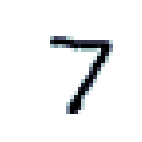

In [28]:
import matplotlib as mpl

plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

## 모형의 저장
트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 "hdf5" 형식으로 저장하였다가 나중에 load 명령으로 불러 사용할 수 있다.

In [30]:
print(model.predict(X_test[:1, :]))

[[0.0292124  0.03600887 0.01668539 0.03498889 0.02168428 0.07472847
  0.01635053 0.9143363  0.01795133 0.09144759]]


In [31]:
print(model.predict_classes(X_test[:1, :], verbose=0))

[7]


In [33]:
model.save('my_model.hdf5')
del model

NameError: name 'model' is not defined

In [34]:
from keras.models import load_model

model2 = load_model('my_model.hdf5')
print(model2.predict_classes(X_test[:1, :], verbose=0))

[7]
